## draw image

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def draw_img(img):
    fig = plt.figure(figsize=(10, 5))
    gs = fig.add_gridspec(1, 2)

    # show in image axis
    ax = fig.add_subplot(gs[0, 0])
    ax.set_title(f"image")
    ax.imshow(img, cmap="gray")


    nw = nh = cv2.getOptimalDFTSize(max(img.shape[:2]))
    output_image = cv2.copyMakeBorder(
        src=img,
        top=0,
        bottom=nh - img.shape[0],
        left=0,
        right=nw - img.shape[1],
        borderType=cv2.BORDER_CONSTANT,
        value=255,
    )

    # thresh
    opt_gray = cv2.adaptiveThreshold(
        ~output_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, -10
    )

    # show adaptive thresh
    ax = fig.add_subplot(gs[0, 1])
    ax.set_title(f"dft size adaptive threshold")
    ax.imshow(opt_gray, cmap="gray")

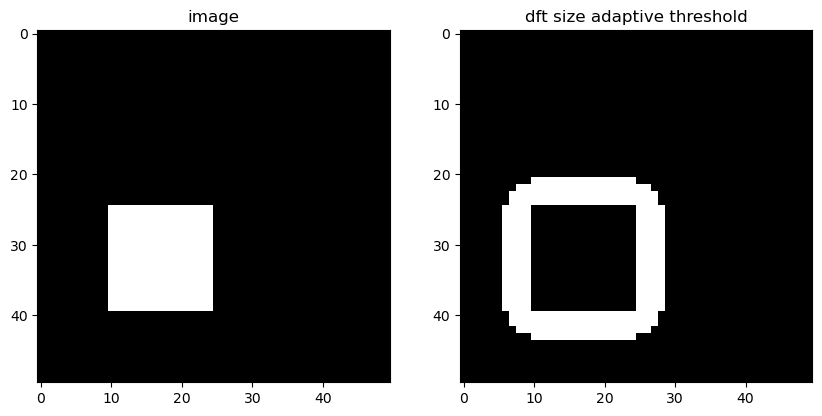

In [2]:
img = np.zeros((50, 50), dtype=np.uint8)

img[25:40, 10:25] = 255
draw_img(img)

## draw dft

In [3]:
import cv2

def draw_dft(name, img):
    fig = plt.figure(figsize=(20, 5))
    fig.suptitle(name)
    gs = fig.add_gridspec(1, 4)

    nw = nh = cv2.getOptimalDFTSize(max(img.shape[:2]))
    output_image = cv2.copyMakeBorder(
        src=img,
        top=0,
        bottom=nh - img.shape[0],
        left=0,
        right=nw - img.shape[1],
        borderType=cv2.BORDER_CONSTANT,
        value=255,
    )
    opt_gray = output_image

    ax = fig.add_subplot(gs[0, 0])
    ax.set_title("image with dft size")
    ax.imshow(opt_gray, cmap="gray")


    # perform fft
    dft = np.fft.fft2(opt_gray)
    shifted_dft = np.fft.fftshift(dft)
    # get the magnitude (module)
    magnitude = np.abs(shifted_dft)

    ax = fig.add_subplot(gs[0, 1])
    ax.set_title(f"dft magnitude")
    ax.imshow(magnitude, cmap="gray")


    dft2 = cv2.dft(np.float32(opt_gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft2)
    magnitude_spectrum = 20 * np.log1p(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

    ax = fig.add_subplot(gs[0, 2])
    ax.set_title(f"dft magnitude 20 * np.log1p")
    ax.imshow(magnitude_spectrum, cmap="gray", aspect='auto')

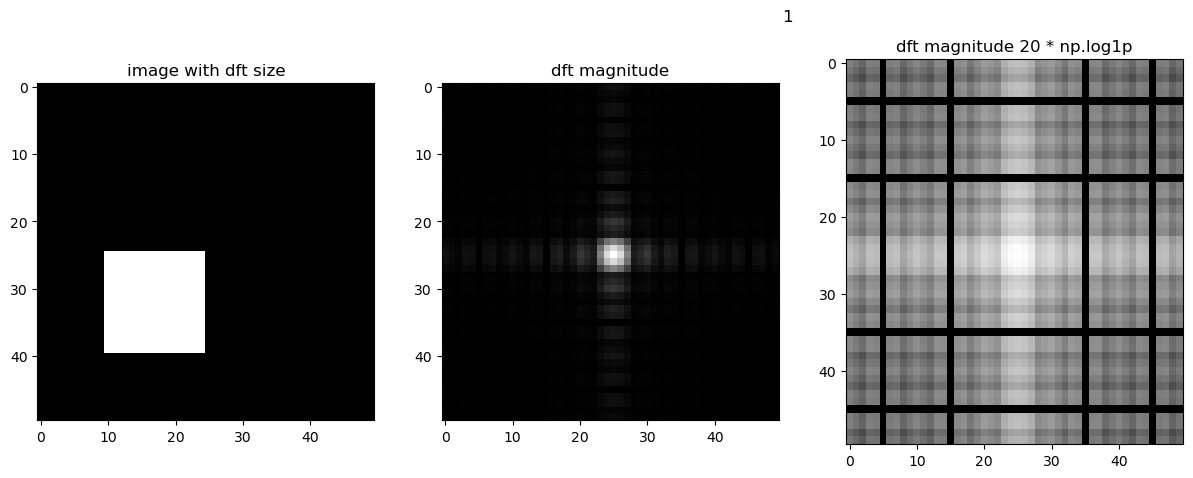

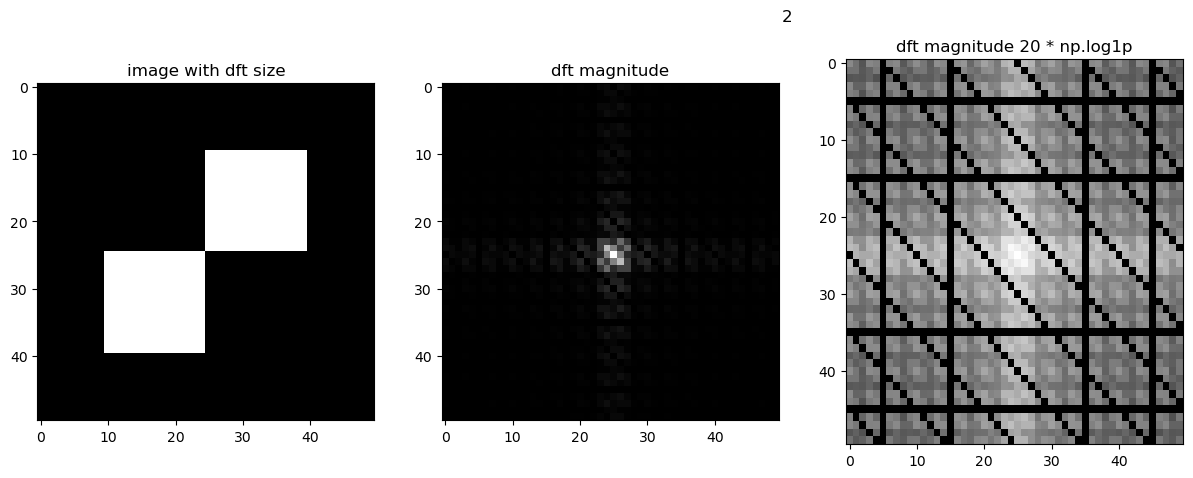

In [4]:
# image with empty
img = np.zeros((50, 50), dtype=np.uint8)

img[25:40, 10:25] = 255
draw_dft("1", img)

img[10:25, 25:40] = 255
draw_dft("2", img)

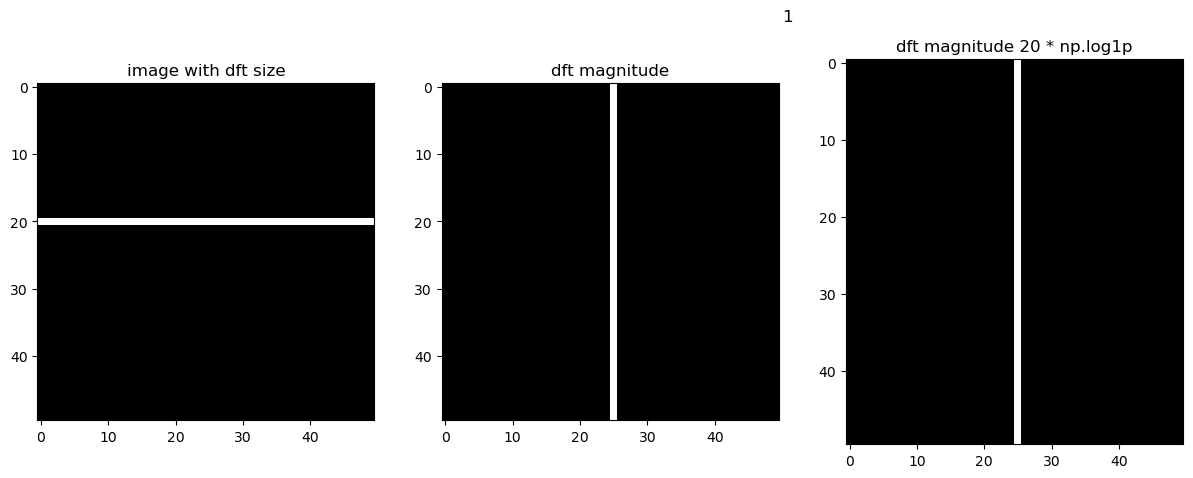

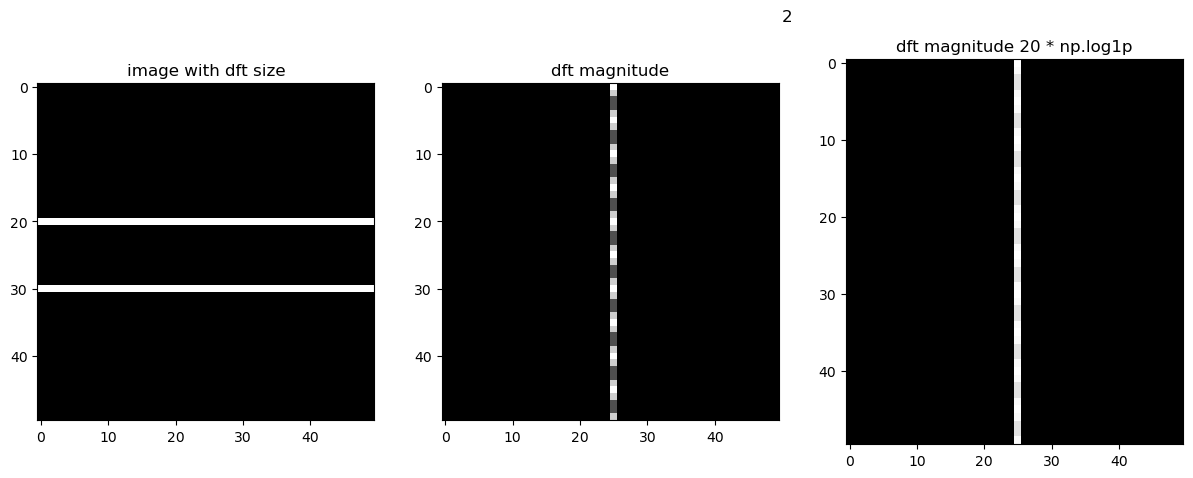

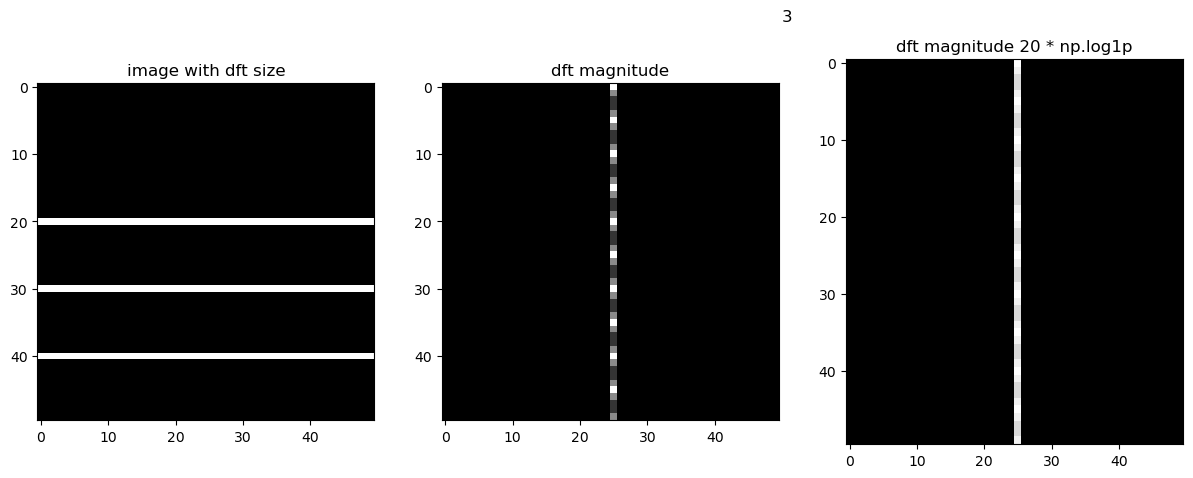

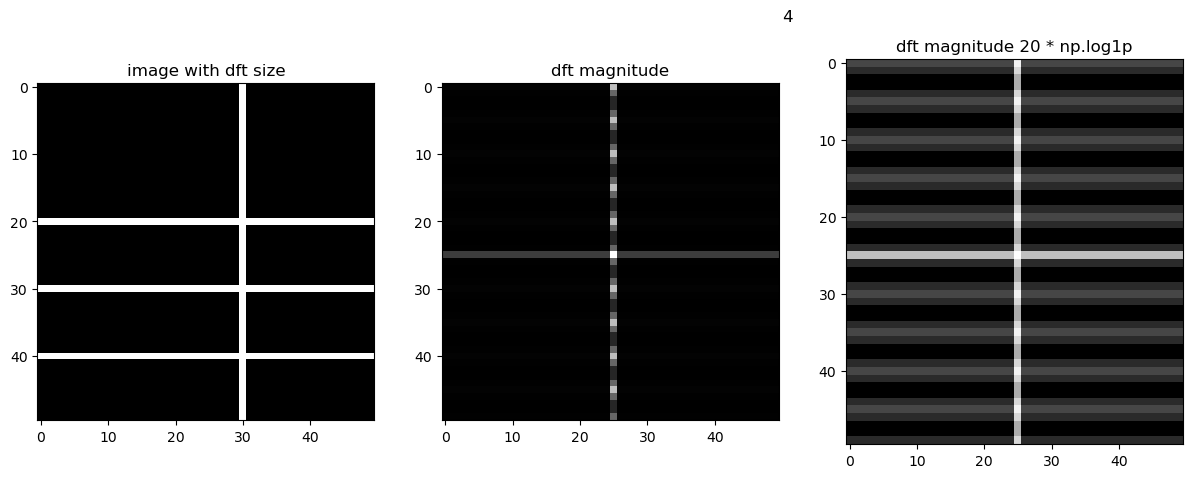

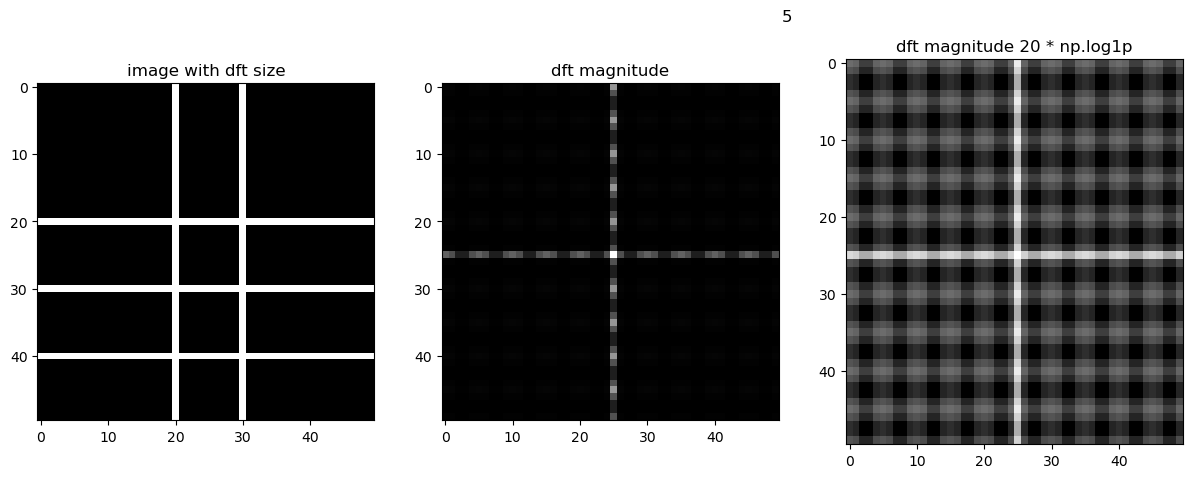

In [5]:
# image with empty
img = np.zeros((50, 50), dtype=np.uint8)

# image with one line
img[20] = 255
draw_dft("1", img)

# image with two lines
img[30] = 255
draw_dft("2", img)

# image with three lines
img[40] = 255
draw_dft("3", img)

# image with 4 lines
img[:, 30] = 255
draw_dft("4", img)

# image with 5 lines
img[:, 20] = 255
draw_dft("5", img)

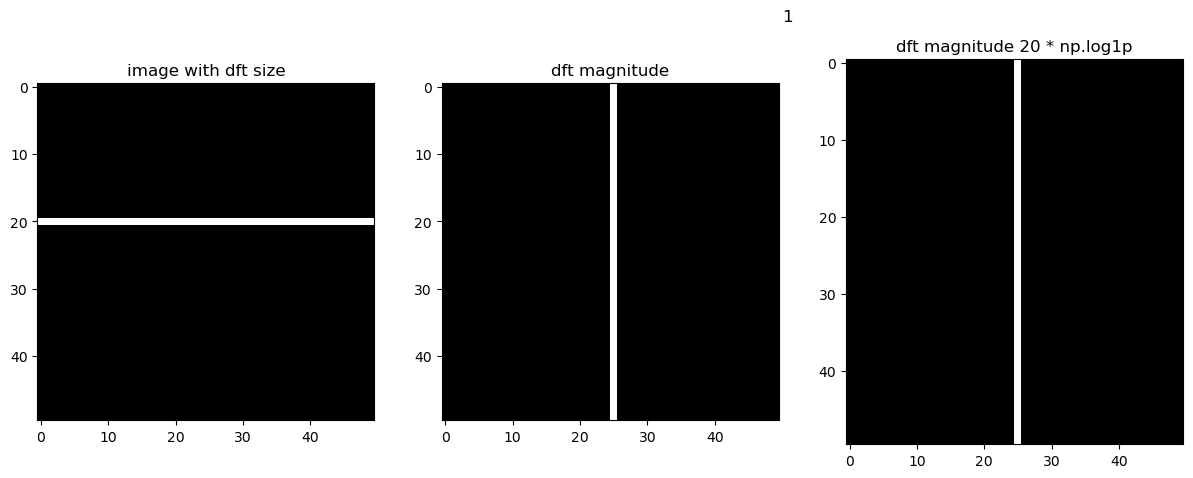

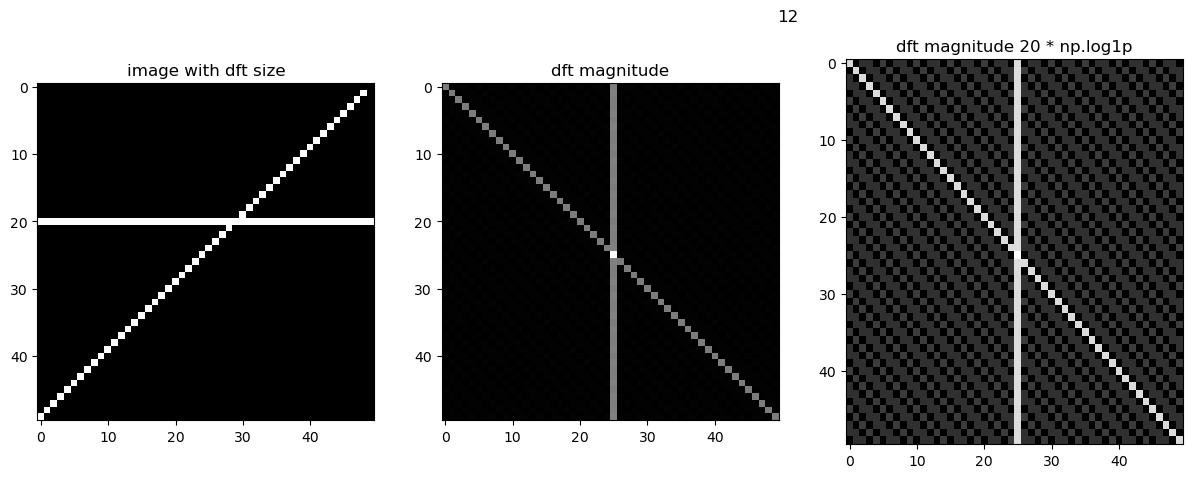

In [6]:
# image with empty
img = np.zeros((50, 50))

# image with one line
img[20] = 255
draw_dft("1", img)

# image with two lines
for i in range(49):
    x = i
    y = -x + 49
    img[y, x] = 255
draw_dft("12", img)

## draw step

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def draw_step(name, magnitude, magnitude_spectrum):
    # 
    sum_results = []

    magnitude_spectrum2 = 20 * np.log1p(magnitude)

    # center and radius
    r = c = magnitude.shape[0] // 2

    # define the degrees in each row
    degs = [-90, -45, 0, 30, 60, 90]
    row_count = len(degs)
    col_count = 4

    fig = plt.figure(figsize=(5 * col_count, 5 * row_count))
    fig.suptitle(f"each degree vector: {name}")
    gs = fig.add_gridspec(row_count, col_count)
    for row_idx,deg in enumerate(degs):
        ax = fig.add_subplot(gs[row_idx, 0])
        ax.set_title(f"degree: {deg}, magnitude_spectrum2")
        ax.set_ylabel("0 axis")
        ax.set_xlabel("1 axis")
        ax.imshow(magnitude_spectrum2, cmap="gray")

        ax = fig.add_subplot(gs[row_idx, 1])
        ax.set_title(f"degree: {deg}, magnitude_spectrum")
        ax.set_ylabel("0 axis")
        ax.set_xlabel("1 axis")
        ax.imshow(magnitude_spectrum, cmap="gray")

        # start point by center
        s0, s1 = (c, c)
        # end point by radius
        angle = np.deg2rad(deg)
        axis0 = c + int(r * np.cos(angle))
        axis1 = c + int(-1 * r * np.sin(angle))
        e0, e1 = (axis0, axis1)

        ax = fig.add_subplot(gs[row_idx, 2])
        ax.set_title(f"degree: {deg}, point start({s0},{s1}) end({e0},{e1})")
        ax.set_ylabel("0 axis")
        ax.set_xlabel("1 axis")
        ax.imshow(magnitude, cmap="gray")
        ax.plot(s1, s0, 'o', color='g')
        ax.plot(e1, e0, 'o', color='r')

        # line vector by start to end
        t = np.deg2rad(deg)
        _f = np.vectorize(
            lambda x: magnitude[c + int(x * np.cos(t)), c + int(-1 * x * np.sin(t))]
        )
        _l = _f(range(0, r))
        lv_2d = np.tile(_l, (2, 1))

        ax = fig.add_subplot(gs[row_idx, 3])
        ax.set_title(f"degree: {deg}, vector start({c},{c}) end({axis0},{axis1})")
        ax.set_xlim(0, lv_2d.shape[1] - 1)
        ax.set_yticklabels([])
        ax.imshow(lv_2d, cmap="gray", vmin=magnitude.min(), vmax=magnitude.max(), aspect='auto')
        ax.plot(0, 1 - 0.5, 'o', color='g')
        ax.plot(r - 1, 1 - 0.5, 'o', color='r')

        # sum vector
        val_init = np.sum(_l)
        sum_results.append(val_init)

    df = pd.DataFrame.from_dict({
        'degree': degs,
        'sum': sum_results,
        'max': sum_results == np.max(sum_results)
    }, orient='columns')
    styled_df = df.style.set_caption(f"each degree sum: {name}")
    display(styled_df)

,degree,sum,max
0,-90,12750.000000,False
1,-45,25500.000000,False
2,0,318750.000000,True
3,30,38250.000000,False
4,60,25500.000000,False
5,90,12750.000000,False


,degree,sum,max
0,-90,32731.973343,False
1,-45,331500.000000,True
2,0,325157.526296,False
3,30,69598.959693,False
4,60,57661.776008,False
5,90,32731.973343,False


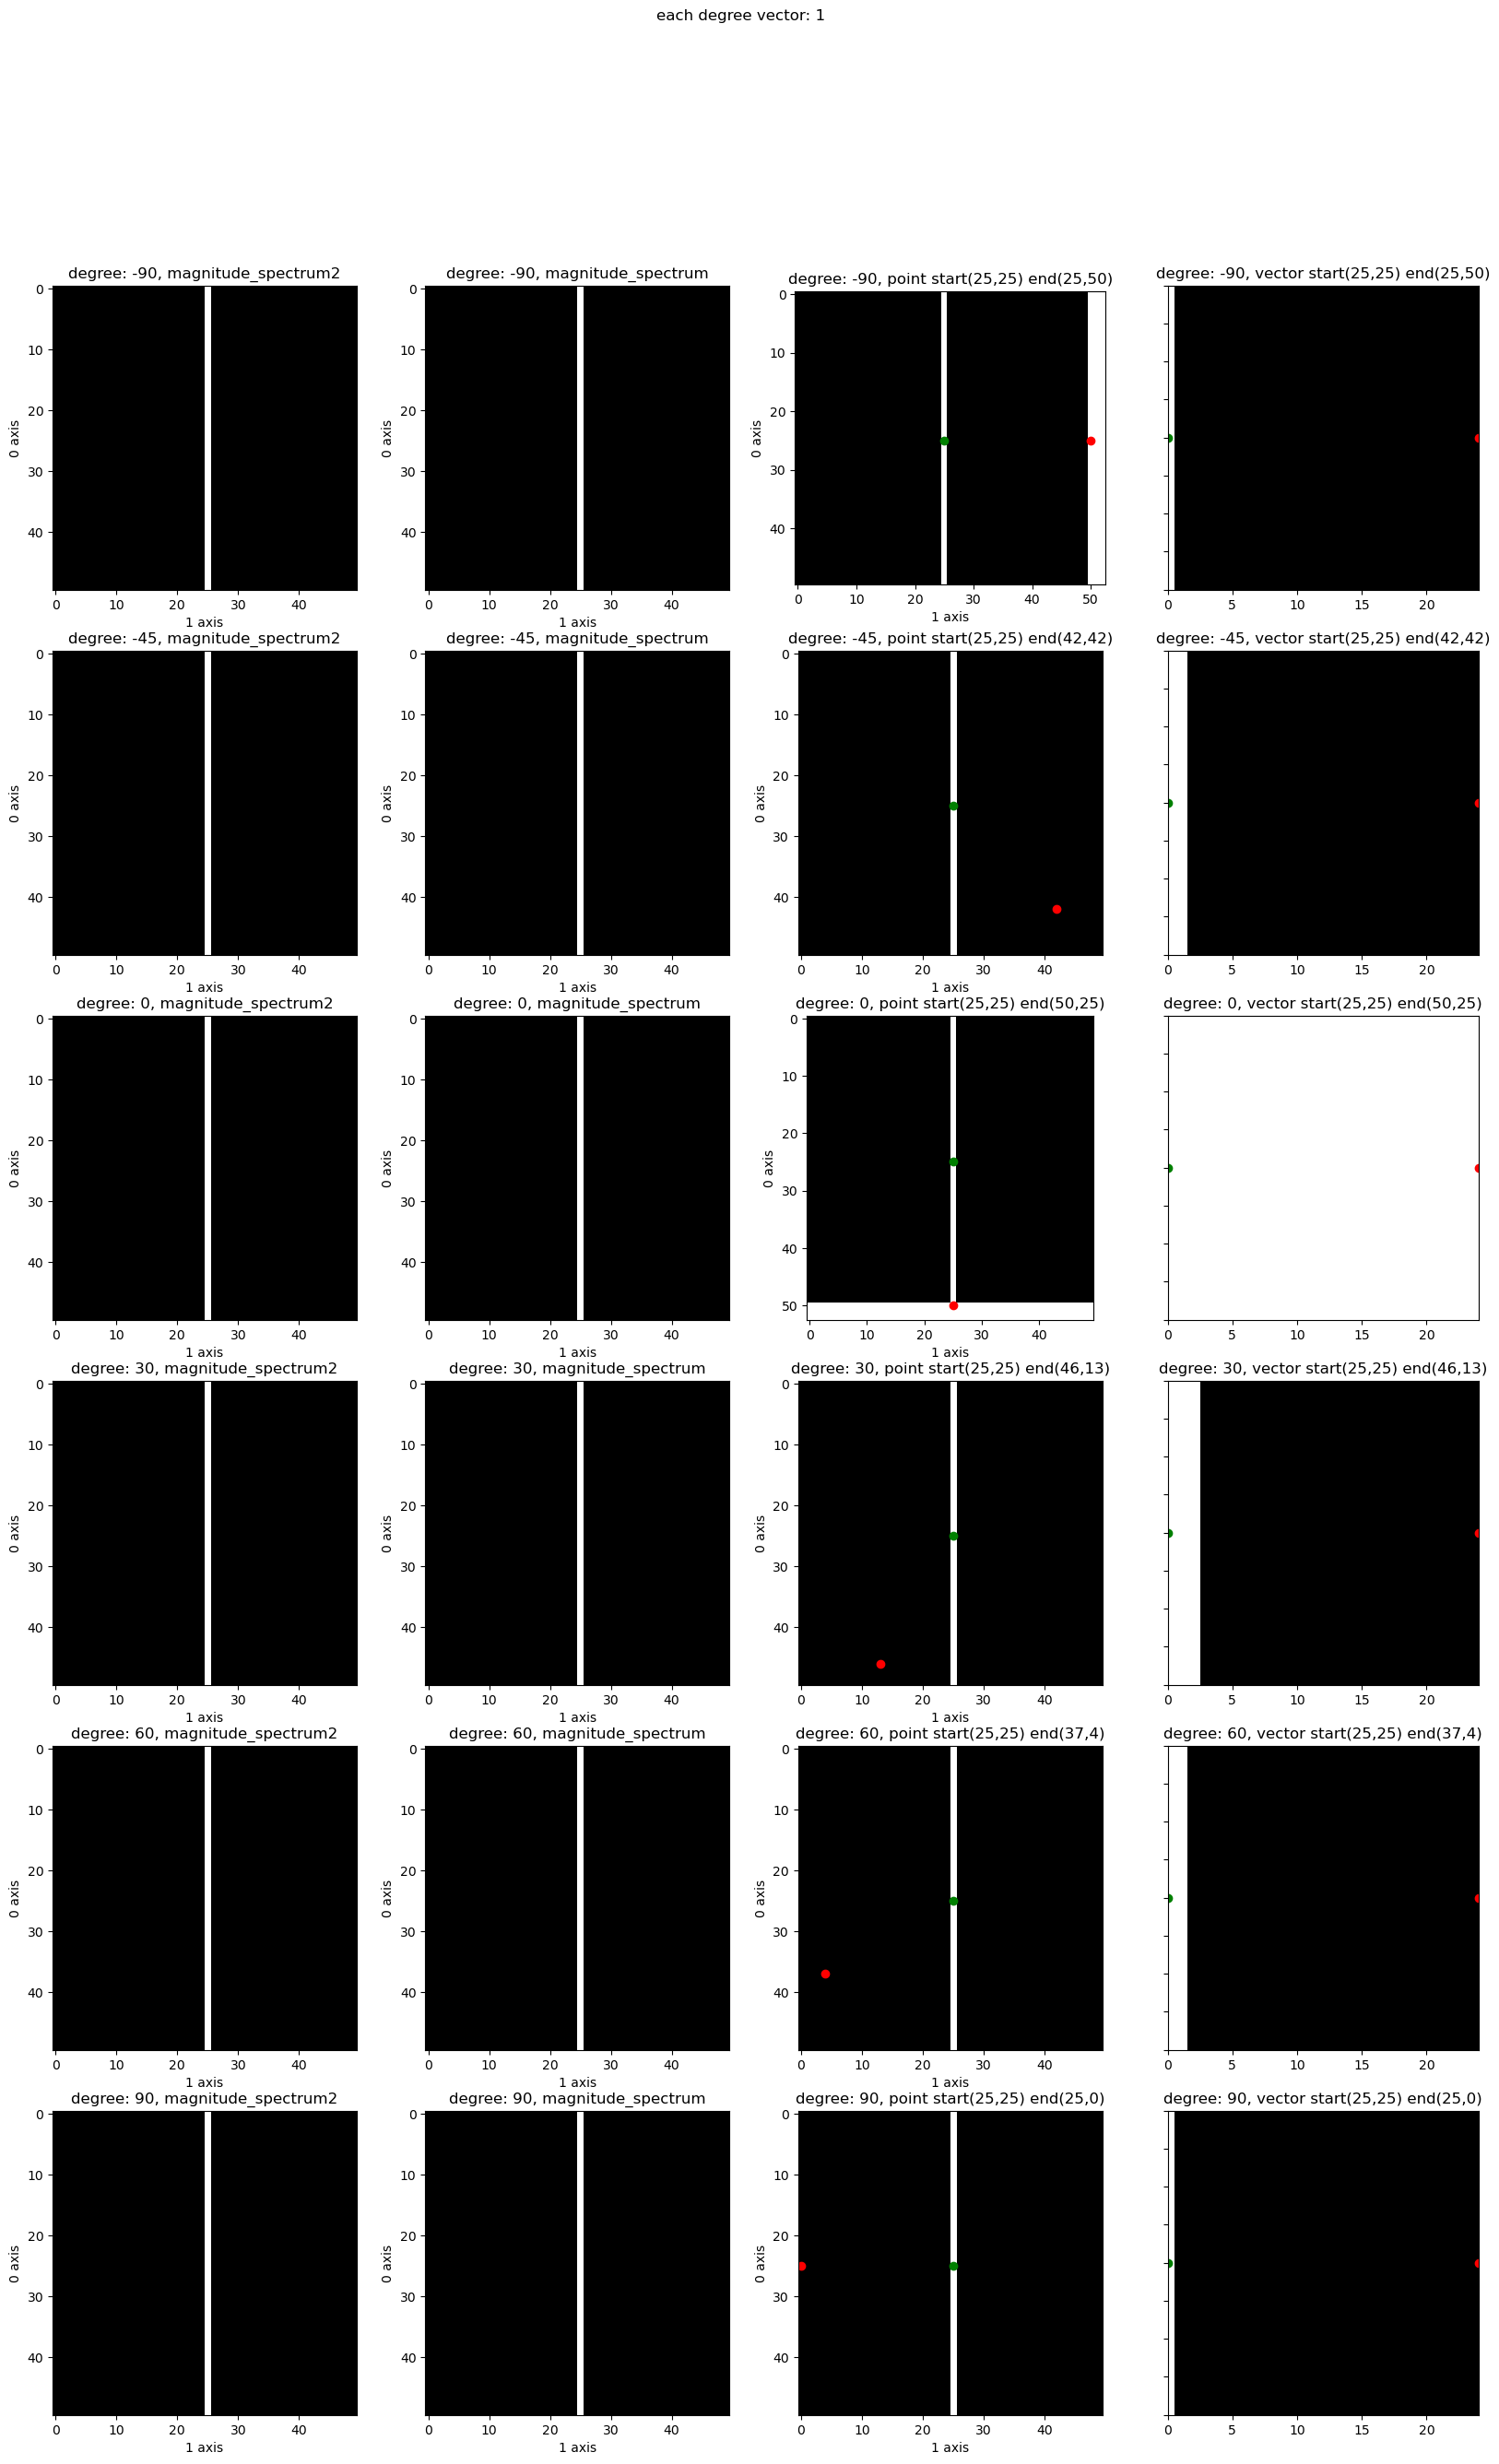

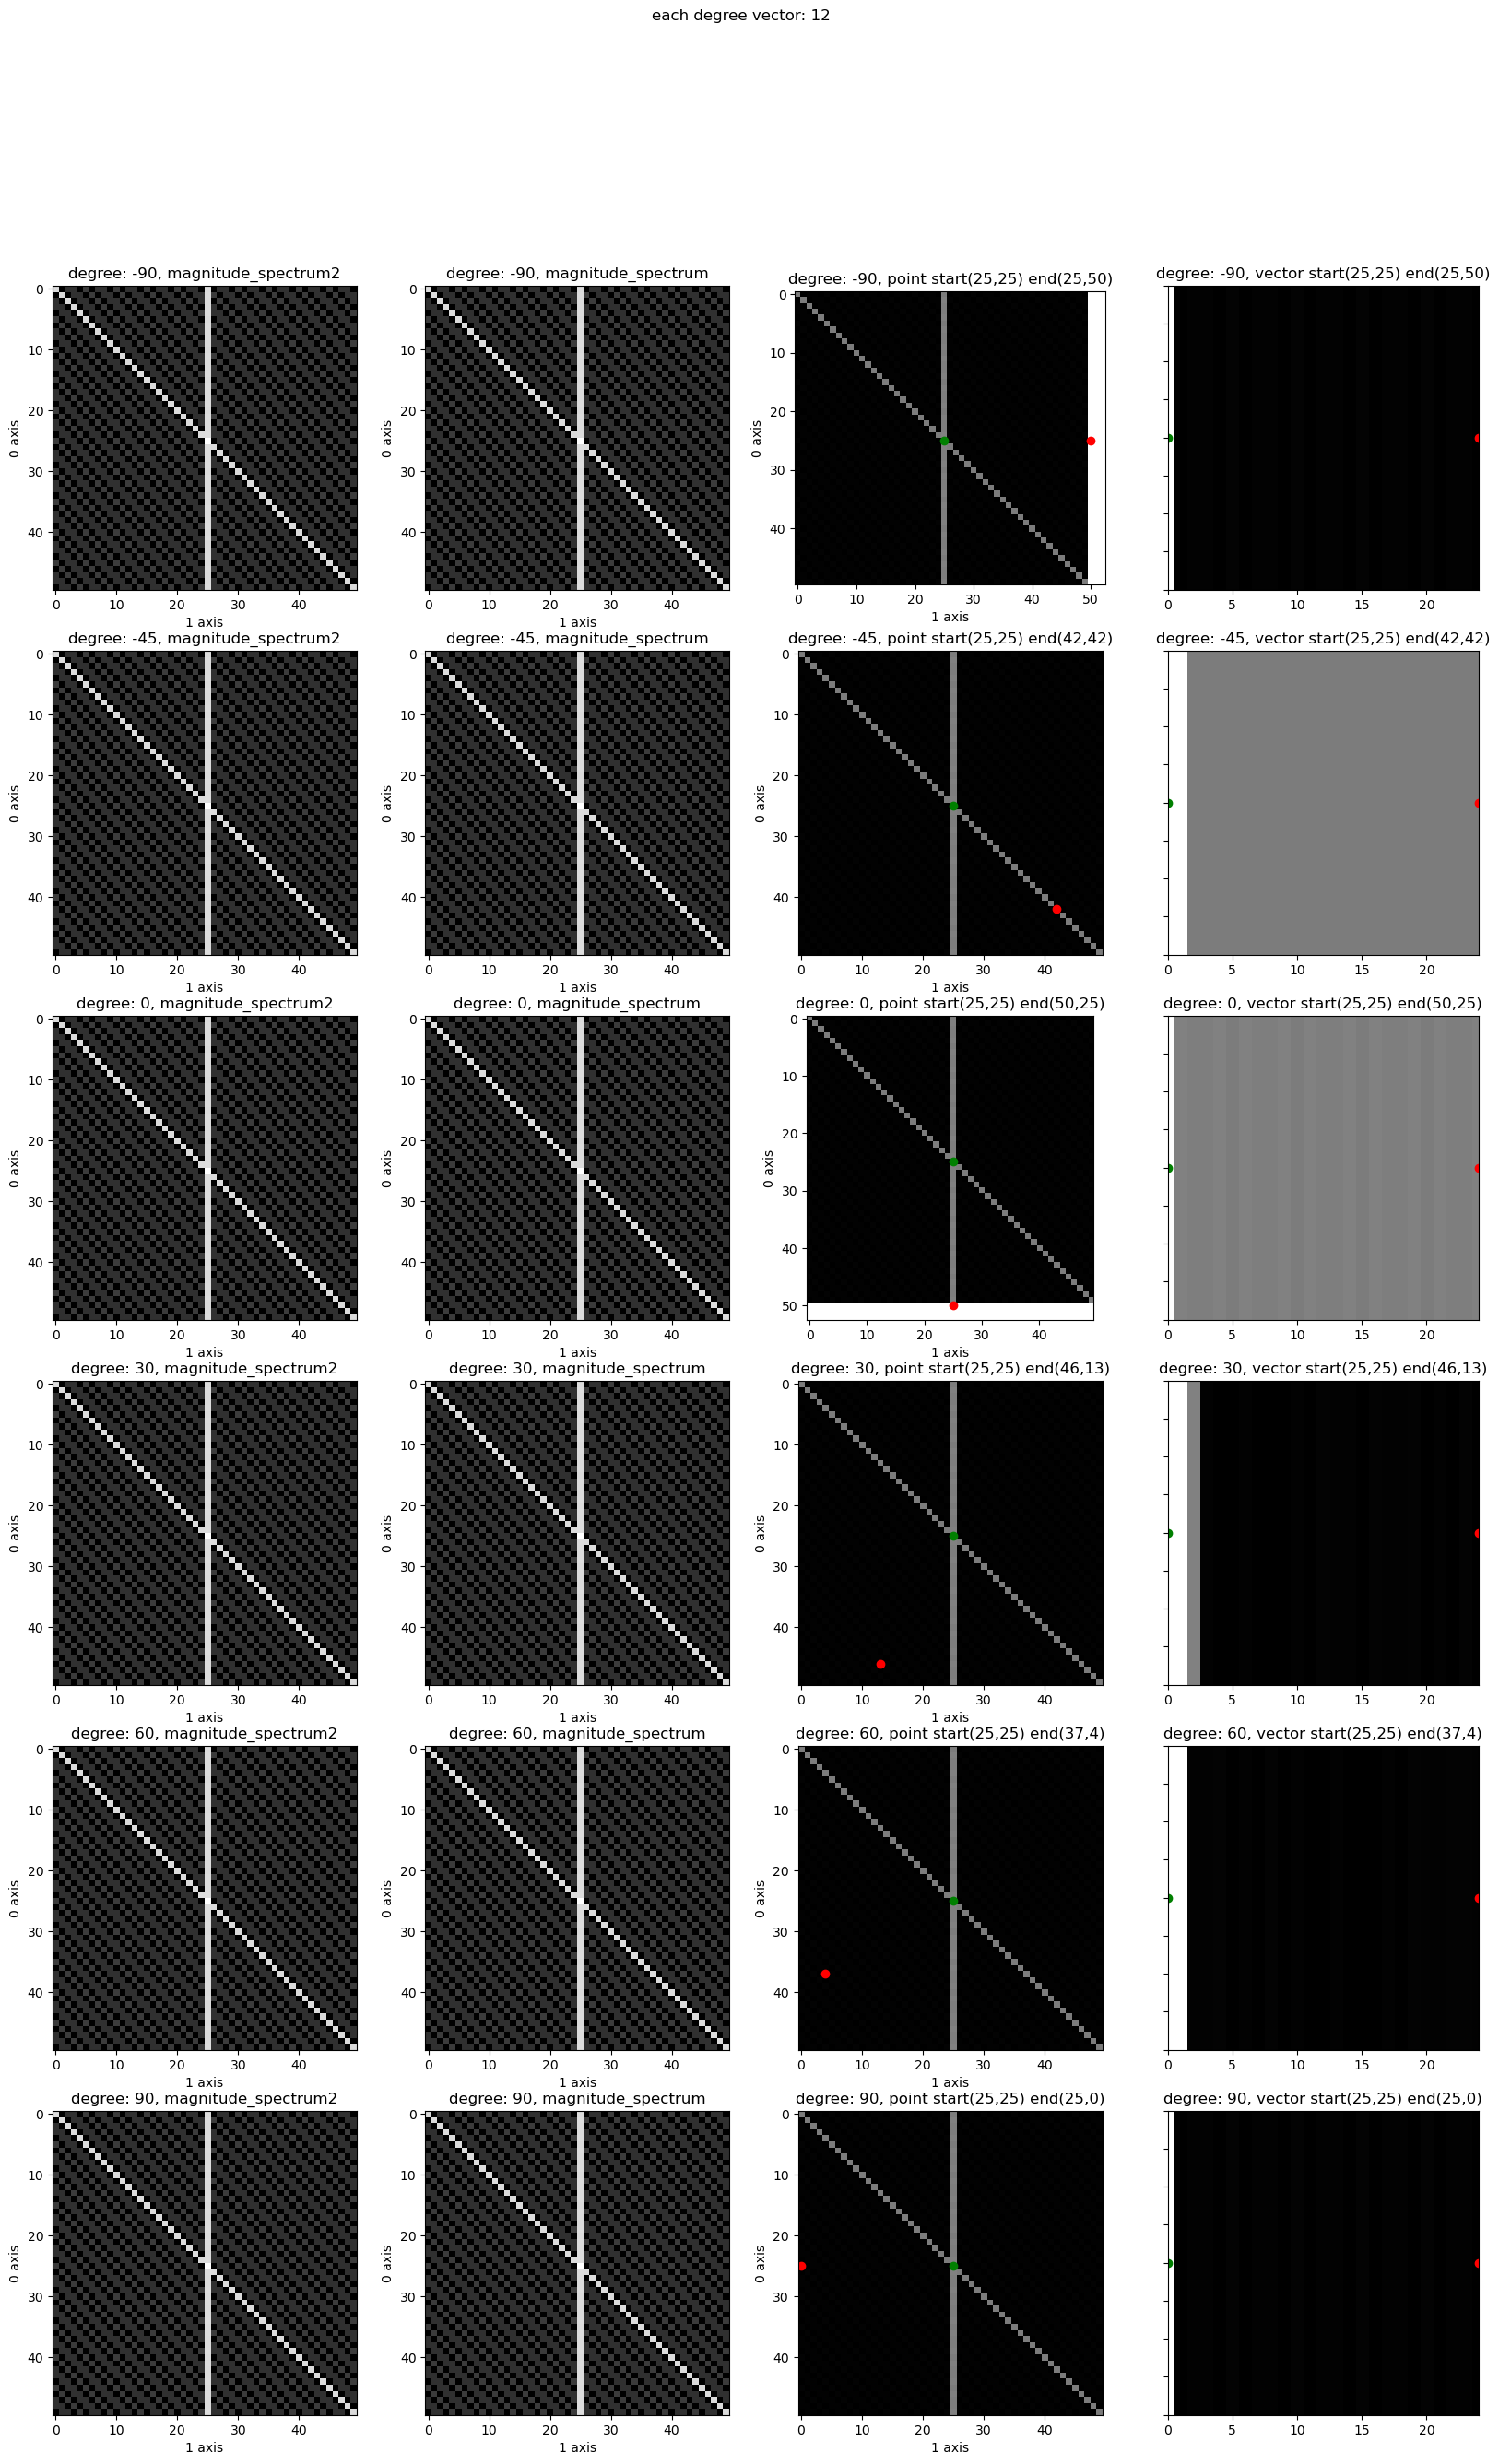

In [8]:
# image with empty
img = np.zeros((50, 50))

# image with one line
img[20] = 255
dft = np.fft.fft2(img)
shifted_dft = np.fft.fftshift(dft)
magnitude = np.abs(shifted_dft)
dft2 = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft2)
magnitude_spectrum = 20 * np.log1p(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
draw_step("1", magnitude, magnitude_spectrum)

# image with two lines
for i in range(49):
    x = i
    y = -x + 49
    img[y, x] = 255
dft = np.fft.fft2(img)
shifted_dft = np.fft.fftshift(dft)
magnitude = np.abs(shifted_dft)
dft2 = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft2)
magnitude_spectrum = 20 * np.log1p(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
draw_step("12", magnitude, magnitude_spectrum)

## draw projection

In [9]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def draw_projection(name, magnitude, magnitude_spectrum):
    magnitude_spectrum2 = 20 * np.log1p(magnitude)

    # center and radius
    r = c = magnitude.shape[0] // 2

    angle_max = 90
    num = 1

    tr = np.linspace(-1 * angle_max, angle_max, int(angle_max * num * 2)) / 180 * np.pi
    profile_arr = tr.copy()

    def f(t):
        _f = np.vectorize(
            lambda x: magnitude[c + int(x * np.cos(t)), c + int(-1 * x * np.sin(t))]
        )
        _l = _f(range(0, r))
        return _l

    vf = np.vectorize(f, otypes=[object])
    v = vf(profile_arr)
    v = np.array([list(item) for item in v])

    li = np.sum(v, axis=1)

    a = tr[np.argmax(li)] / np.pi * 180

    if a == -1 * angle_max:
        a = 0

    row_count = 1
    col_count = 4

    fig = plt.figure(figsize=(5 * col_count, 5 * row_count))
    fig.suptitle(f"vector: {name}")
    gs = fig.add_gridspec(row_count, col_count)
    
    ax = fig.add_subplot(gs[0, 0])
    ax.set_title(f"magnitude_spectrum2")
    ax.set_ylabel("0 axis")
    ax.set_xlabel("1 axis")
    ax.imshow(magnitude_spectrum2, cmap="gray")

    ax = fig.add_subplot(gs[0, 1])
    ax.set_title(f"magnitude_spectrum")
    ax.set_ylabel("0 axis")
    ax.set_xlabel("1 axis")
    ax.imshow(magnitude_spectrum, cmap="gray")

    ax = fig.add_subplot(gs[0, 2])
    ax.set_title(f"vector + max angle: {a}")
    ax.set_xlabel("angle")
    ax.set_ylabel("vector")
    ax.imshow(v.T, cmap="gray", extent=[90, -90, v.shape[1], 0])
    ax.axvline(a, color='r')

    ax = fig.add_subplot(gs[0, 3])
    ax.set_title(f"sum + max angle: {a}")
    ax.set_xlabel("angle")
    ax.set_ylabel("sum")
    x_data = np.linspace(-90, 90, 180)
    ax.plot(x_data, li)
    ax.axvline(a, color='r')

    idxs = np.where(li == np.max(li))
    df = pd.DataFrame.from_dict({
        'degree': idxs[0] - 90,
        'sum': li[idxs]
    }, orient='columns')
    styled_df = df.style.set_caption(f"max sum: {name}")
    display(styled_df)

,degree,sum
0,-2,318750.000000
1,-1,318750.000000
2,0,318750.000000
3,1,318750.000000


,degree,sum
0,-2,337445.342612
1,-1,337445.342612
2,0,337445.342612
3,1,337445.342612


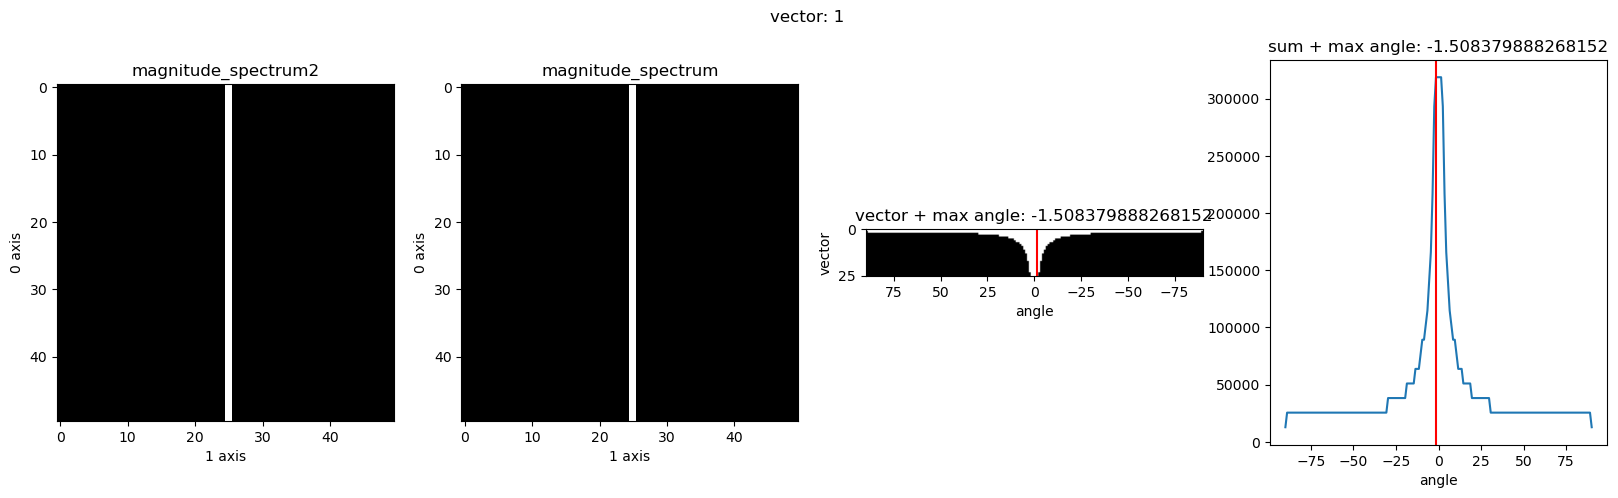

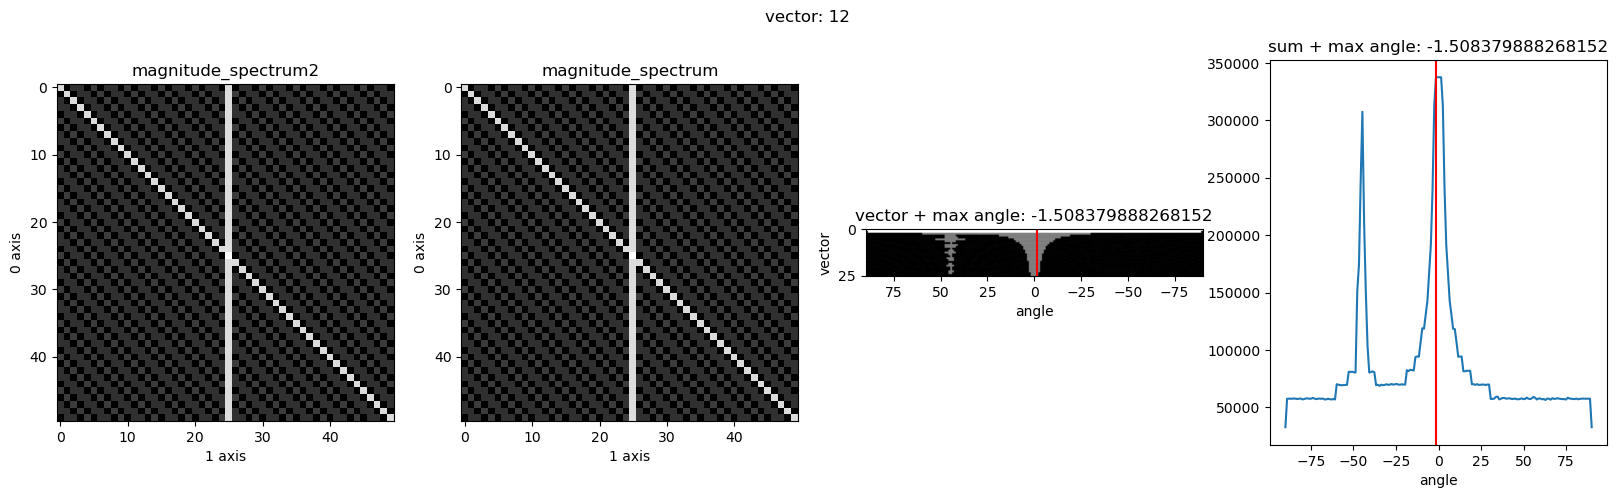

In [10]:
# image with empty
img = np.zeros((50, 50))

# image with one line
img[20] = 255
dft = np.fft.fft2(img)
shifted_dft = np.fft.fftshift(dft)
magnitude = np.abs(shifted_dft)
dft2 = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft2)
magnitude_spectrum = 20 * np.log1p(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
draw_projection("1", magnitude, magnitude_spectrum)

# image with two lines
for i in range(49):
    x = i
    y = -x + 49
    img[y, x] = 255
dft = np.fft.fft2(img)
shifted_dft = np.fft.fftshift(dft)
magnitude = np.abs(shifted_dft)
dft2 = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft2)
magnitude_spectrum = 20 * np.log1p(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
draw_projection("12", magnitude, magnitude_spectrum)